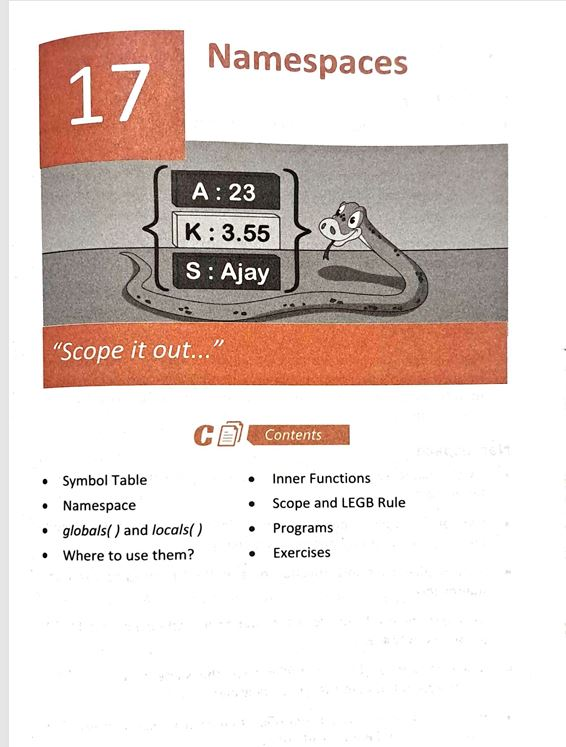

## <a id='link1'></a> **`17. Namespaces`**

- [01.Symbol Table](#sub17-1)  
- [02.Namespace](#sub17-2)  
- [03.globals() and locals()](#sub17-3)  
- [04.Where to use them?](#sub17-4)  
- [05.Inner Functions](#sub17-5)  
- [06.Scope and LEGB Rule](#sub17-6)  
- [07.Programs](#sub17-9)  
- [08.Exercises](#sub17-11)

## <a id ="sub17-1"><a/>**`1.Symbol Table`**

- Variable names, function names, and class names are generally called **identifiers**.
- While interpreting our program, the Python interpreter creates a **symbol table** consisting of identifiers and relevant information about each identifier.
- The relevant information includes:
  - Type of the identifier
  - Scope level
  - Location in memory
- This information helps the interpreter decide whether operations on identifiers are valid.
- **Example:**  
  If an identifier is marked as a `tuple` in the symbol table and later in the program we try to modify it, the interpreter will throw an error since a `tuple` is immutable.

---


## <a id ="sub17-2"><a/>**`2.Namespace`**

- A **namespace** is a space that holds names (identifiers).
- Programmatically, a namespace is a **dictionary** of identifiers (keys) and their corresponding objects (values).
- Identifiers used inside a function/method belong to the **local namespace**.
- Identifiers used outside any function/method belong to the **global namespace**.
- If a local and global identifier have the same name, the **local identifier shadows** the global one.
- By default, Python treats any variable assigned inside a function as **local**.
- To modify a global variable inside a function, we must declare it as **global** using the `global` keyword.

```python
# Example of global keyword
x = 10

def modify():
    global x
    x = 20

modify()
print(x)  # Output: 20
```


```python
def fun():
    # name conflict. local a shadows out global a
    a = 45
    # name conflict, use global b
    global b
    b = 6.28
    # uses local a, global b and s
    # no need to define s as global, since it is not being changed
    print(a, b, s)
    
# global identifiers
a = 20
b = 3.14
s = 'Aabra Ka Daabra'
fun()
print(a, b, s)   # b has changed, a and s are unchanged

## <a id="sub17-3"><a/> **`3.globals() and locals()`**

- Dictionary of identifiers in global and local namespaces can be obtained using built-in functions `globals()` and `locals()`.
- If `locals()` is called from within a function/method, it returns a dictionary of identifiers that are accessible from that function/method.
- If `globals()` is called from within a function/method, it returns a dictionary of global identifiers that can be accessed from that function/method.
- Following program illustrates usage of `globals()` and `locals()`:

```python
def fun():
    a = 45
    global b
    b = 6.28
    print("Local variables:", locals())
    print("Global variables:", globals())

# Global variables
a = 20
b = 3.14
s = 'Aabra Ka Daabra'cals():nations.
print(locals())
print(globals())
fun()

```
```python
{'a': 20, 'b': 6.28, 's': 'Aabra Ka Daabra'}
{'a': 20, 'b': 6.28, 's': 'Aabra Ka Daabra'}
{'a': 45}
{'a': 20, 'b': 6.28, 's': 'Aabra Ka Daabra'}

```
- The first, second and last line above shows abridged output. A global scope locals() and globals() return the same dictionary of global namespace.
- 
Inside the function fun(), locals() returns the local namespace, whereas globals() returns global namespace as seen from the output above.

## <a id="sub17-4"><a/>**`4. Where to use them?`**

- Apart from finding out what all is available in the local and global namespace, globals() and locals() can be used to access variables using strings. This is shown in the following pr

```python

a = 20
b = 3.14
s = 'Aabra Ka Daabra'
ist = ['a', 'b', 's']
for var in ist :
    print(globals()[var])

```
- On execution it produces the following output:

```python
20
3.14
Aabra Ka Daabra

```
- **globals( )[var]** gives the current value of var in global namespace.
- Using the same technique, we can call different functions through the same variable as shown below:
  
```python
def fun1() :
print('Inside fun1')
def fun2():
    print('Inside fun2')
def fun3():
    print('Inside fun3')
ist = ['fun1', 'fun2', 'fun3']
for var in lst :
    globals()[var]()
    
```   
- On execution it produces the following output:

```python
inside fun1
inside fun2
inside fun3
```

### <a id="sub17-5"><a/>**`5. Inner Functions`**

- An inner function is simply a function that is defined inside another function. Following program shows how to do this:
```python
  # outer function
  def display() :
    a = 500
    print ('Saving is the best thing...')
    # inner function
    def show() :
    print ('Especially when your parents have done it for you!')
    print(a)
    show()
display()

```
- On executing this program, we get the following output:
```python
Saving is the best thing...
Especially when your parents have done it for you!
500
```
- show() being the inner function defined inside display(), it can be called only from within display(). In that sense, show() has been encapsulated inside display().

- The inner function has access to variables of the enclosing functs, but it cannot change the value of the variable. Had we done a set in show(), a new local a would have been created and set, and the one belonging to display().

### **`6.Scope and LEGB Rule`**

- Scope of an identifier indicates where it is available for use.

- Scope can be Local (L), Enclosing (E), Global (G), Built-in (B). Scopes becomes more and more liberal from Local to Built-in. This can be best understood though the program given below.

```python
def fun1() :  
    y = 20  
    print(x, y)  
    print(len(str(x)))  

def fun2() :  
    z = 30  
    print(x, y, z)  
    print(len(str(x)))  

fun2()  

x = 10  
print(len(str(x)))  

fun1()
```
- Output of the program is given below:
```python
2  
10 20  
2  
10 20 30  
2  
2

```
- len, str, print can be used anywhere in the program without importing any module. So, they have a built-in scope.
- Variable x is created outside all functions, so it has a global scope. It is available to fun1() as well as fun2().
- fun2() is nested inside fun1(). So identifier y created in fun1() is available to fun2(). When we attempt to print y in fun2(), it is notfound in fun2(), hence the search is continued in the enclosing function fun1(). Here it is found hence its value 20 gets printed. This is an example of enclosing scope.
- identifier z is local to fun2(). So it is available only to statements within fun2(). Thus, it has a local scope.

## ============================= End of chapter 17===================